In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
file_path = r'esg_df.csv'
df = pd.read_csv(file_path)

In [7]:
# Set plot style
sns.set(style="whitegrid")

In [8]:
# 1. Profiling the data
eda_summary = {
    "Shape": df.shape,
    "Columns": df.columns.tolist(),
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Summary Stats": df.describe()
}

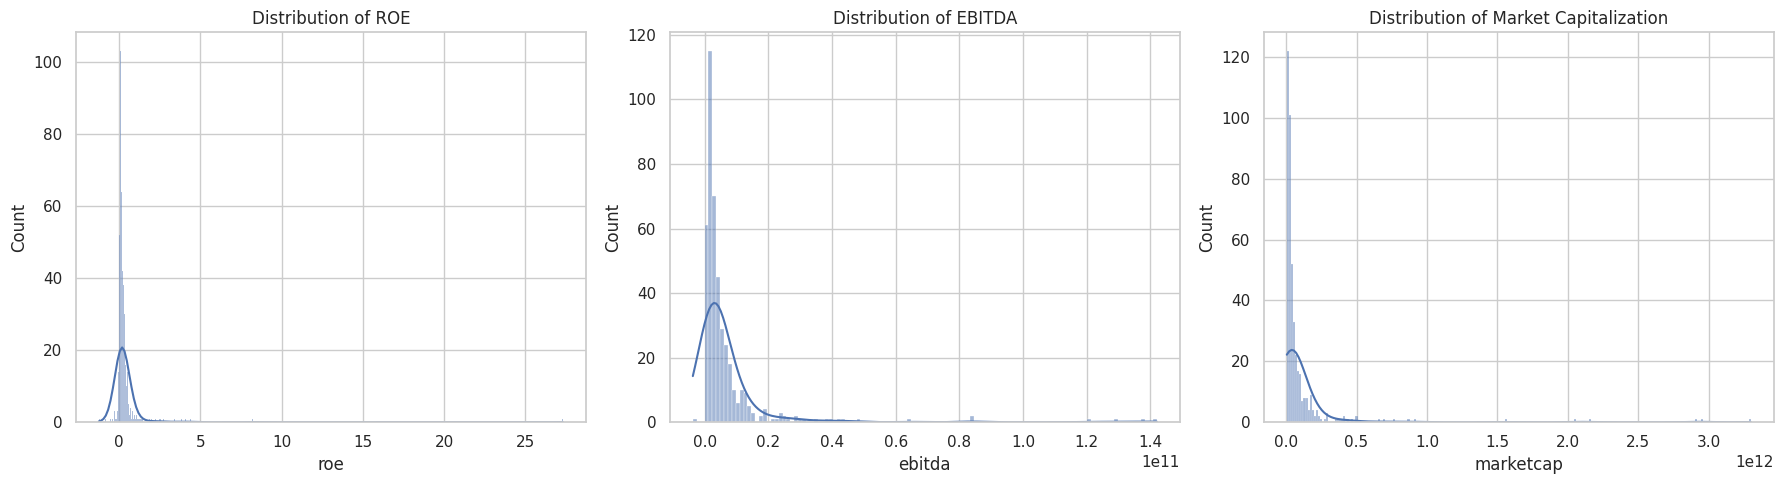

In [9]:
# 2. Analyzing Key Financial Indicators

# Plot distributions of financial metrics
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['roe'], kde=True, ax=axs[0])
axs[0].set_title('Distribution of ROE')

sns.histplot(df['ebitda'], kde=True, ax=axs[1])
axs[1].set_title('Distribution of EBITDA')

sns.histplot(df['marketcap'], kde=True, ax=axs[2])
axs[2].set_title('Distribution of Market Capitalization')
plt.tight_layout()
plt.show()

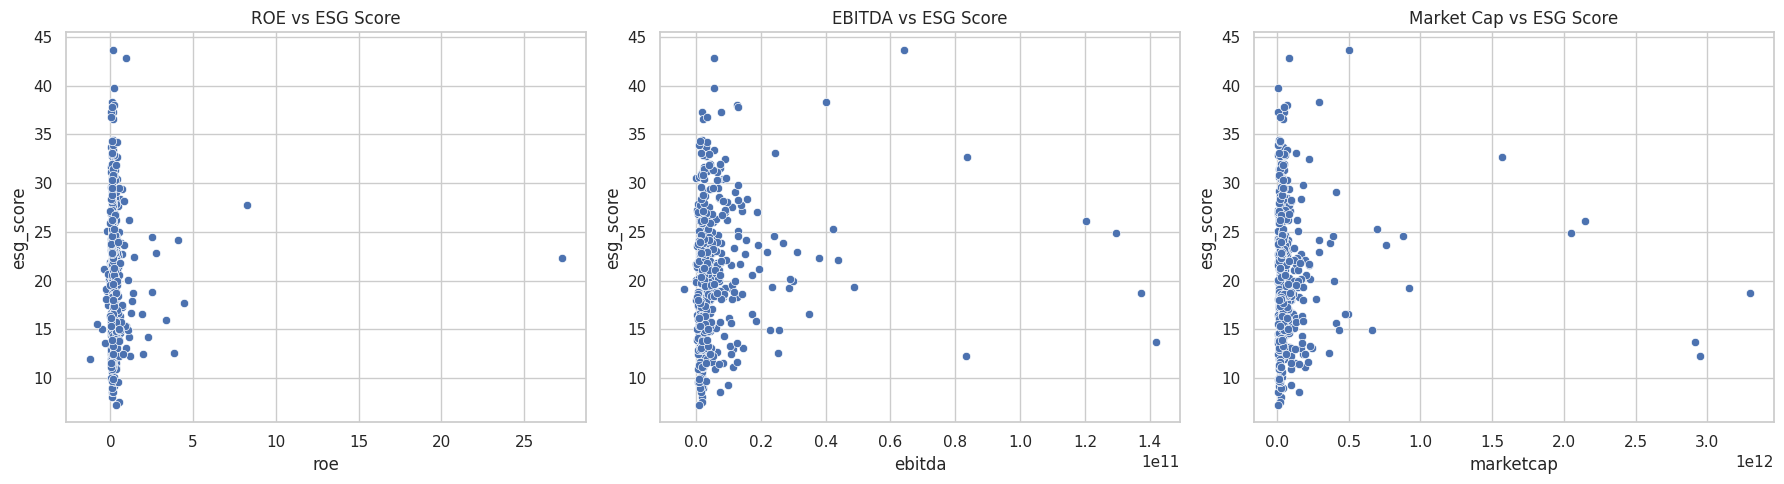

In [10]:
# Scatter plots against ESG score
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='roe', y='esg_score', data=df, ax=axs[0])
axs[0].set_title('ROE vs ESG Score')

sns.scatterplot(x='ebitda', y='esg_score', data=df, ax=axs[1])
axs[1].set_title('EBITDA vs ESG Score')

sns.scatterplot(x='marketcap', y='esg_score', data=df, ax=axs[2])
axs[2].set_title('Market Cap vs ESG Score')
plt.tight_layout()
plt.show()

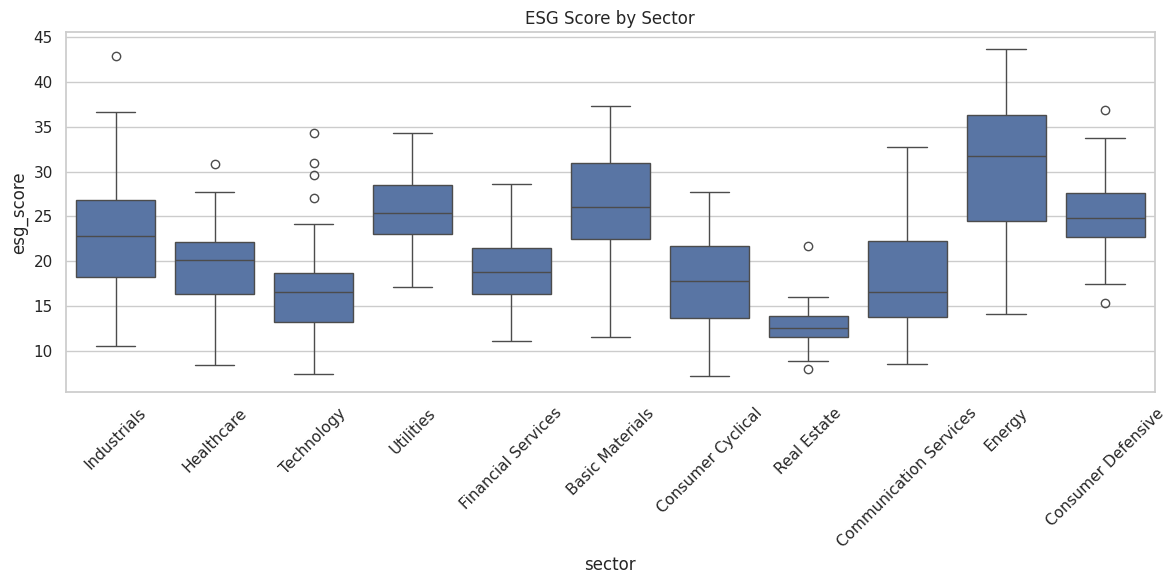

In [11]:
# ESG score variation across sectors
plt.figure(figsize=(12, 6))
sns.boxplot(x='sector', y='esg_score', data=df)
plt.xticks(rotation=45)
plt.title('ESG Score by Sector')
plt.tight_layout()
plt.show()

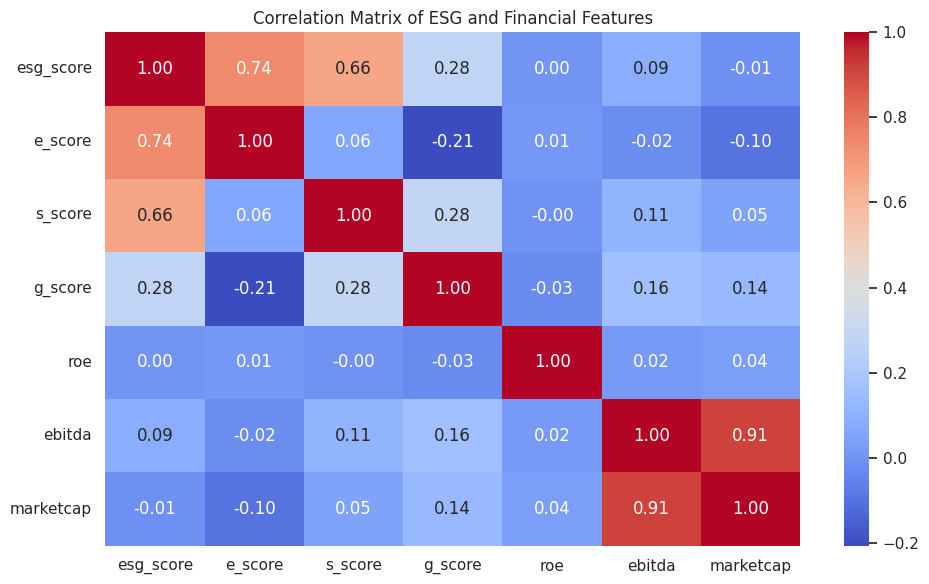

In [12]:
# 3. Correlation analysis
correlation_matrix = df[['esg_score', 'e_score', 's_score', 'g_score', 'roe', 'ebitda', 'marketcap']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of ESG and Financial Features')
plt.tight_layout()
plt.show()

In [13]:
eda_summary

{'Shape': (437, 10),
 'Columns': ['esg_score',
  'esg_cat',
  'e_score',
  's_score',
  'g_score',
  'ebitda',
  'roe',
  'marketcap',
  'industry',
  'sector'],
 'Data Types': esg_score    float64
 esg_cat       object
 e_score      float64
 s_score      float64
 g_score      float64
 ebitda       float64
 roe          float64
 marketcap      int64
 industry      object
 sector        object
 dtype: object,
 'Missing Values': esg_score    0
 esg_cat      0
 e_score      0
 s_score      0
 g_score      0
 ebitda       0
 roe          0
 marketcap    0
 industry     0
 sector       0
 dtype: int64,
 'Summary Stats':         esg_score     e_score     s_score     g_score        ebitda  \
 count  437.000000  437.000000  437.000000  437.000000  4.370000e+02   
 mean    20.631487    6.393089    8.985286    5.253135  6.910413e+09   
 std      6.735142    5.167597    3.599776    1.905939  1.507042e+10   
 min      7.280000    0.000000    0.890000    1.900000 -3.756000e+09   
 25%     15.340000

In [14]:
import numpy as np

In [15]:
# Create a new dataframe with log-transformed features to handle skewness and wide ranges
df_transformed = df.copy()
df_transformed['log_ebitda'] = np.log1p(df_transformed['ebitda'])
df_transformed['log_marketcap'] = np.log1p(df_transformed['marketcap'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [16]:
# Check correlation matrix again after transformation
transformed_corr = df_transformed[['esg_score', 'e_score', 's_score', 'g_score', 'roe', 'log_ebitda', 'log_marketcap']].corr()

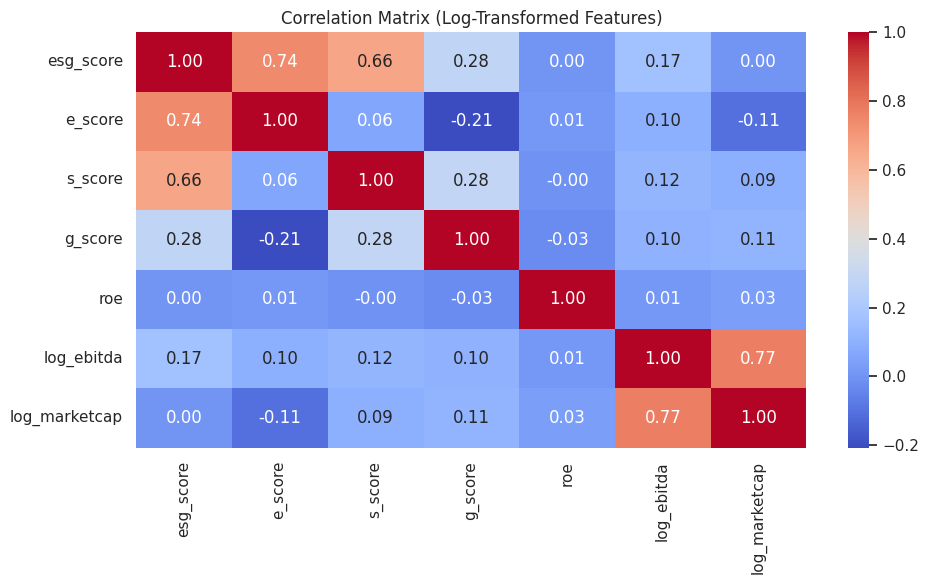

In [17]:
# Visualize the new correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(transformed_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Log-Transformed Features)')
plt.tight_layout()
plt.show()


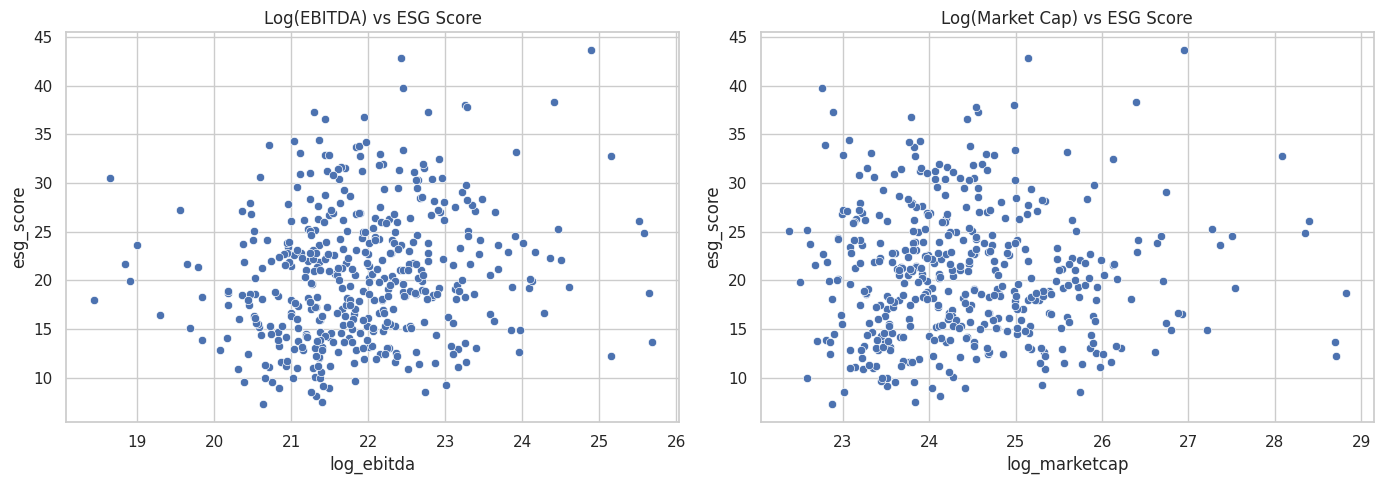

In [18]:
# Scatter plots after transformation
fig, axs = plt.subplots(1, 2, figsize=(14, 5))
sns.scatterplot(x='log_ebitda', y='esg_score', data=df_transformed, ax=axs[0])
axs[0].set_title('Log(EBITDA) vs ESG Score')

sns.scatterplot(x='log_marketcap', y='esg_score', data=df_transformed, ax=axs[1])
axs[1].set_title('Log(Market Cap) vs ESG Score')
plt.tight_layout()
plt.show()

In [19]:
# Also check correlation values for model selection
transformed_corr['esg_score'].sort_values(ascending=False)

,esg_score
esg_score,1.000000
e_score,0.740942
s_score,0.661202
g_score,0.275988
log_ebitda,0.165895
roe,0.001895
log_marketcap,0.000665


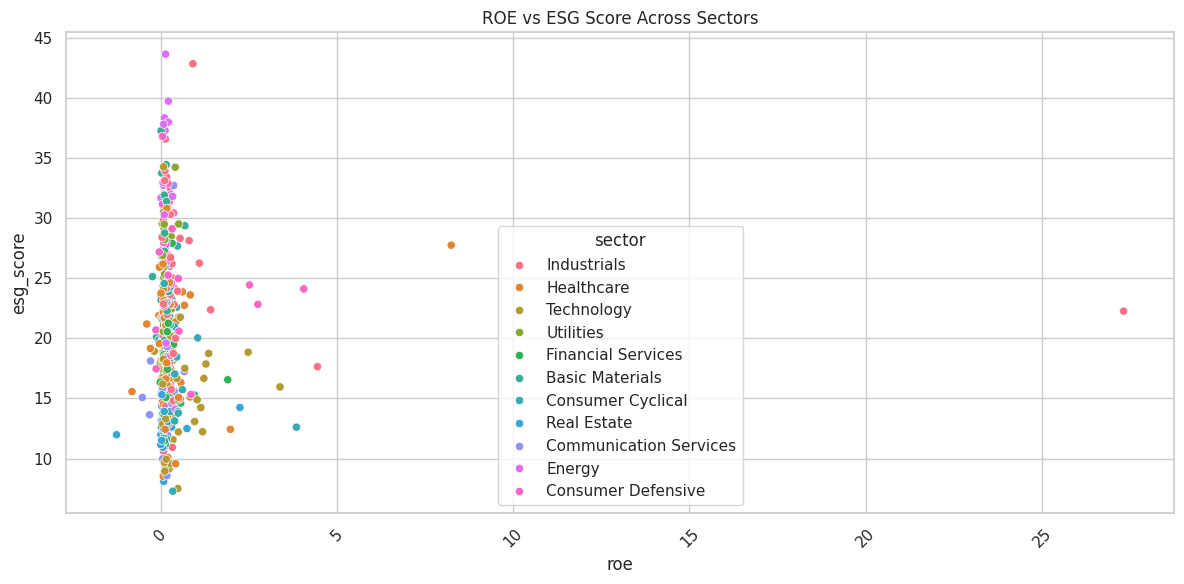

In [20]:
# Exploring interaction: ROE vs ESG Score across different sectors
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='roe', y='esg_score', hue='sector')
plt.title('ROE vs ESG Score Across Sectors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

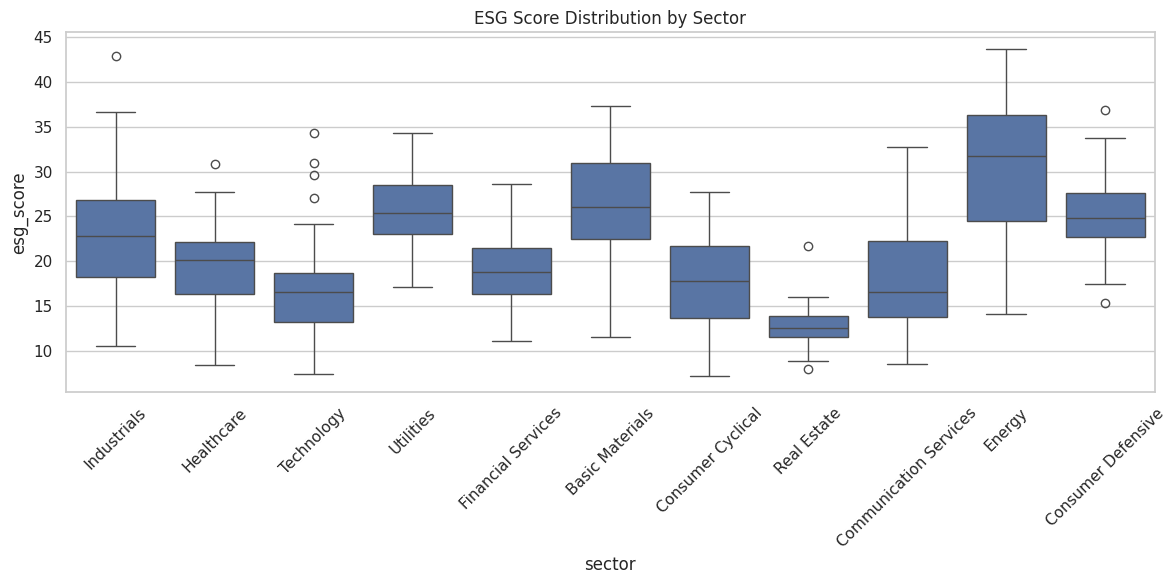

In [21]:
# 2. Boxplot to visualize ESG score distribution across sectors
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sector', y='esg_score')
plt.xticks(rotation=45)
plt.title('ESG Score Distribution by Sector')
plt.tight_layout()
plt.show()

In [22]:
# 3. Sector-wise mean ESG scores to prepare for clustering
sector_means = df.groupby('sector')[['esg_score', 'roe', 'ebitda', 'marketcap']].mean()

In [23]:
# Normalize data for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
sector_scaled = scaler.fit_transform(sector_means)

In [24]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(sector_scaled)

In [25]:
# Add cluster labels to sector_means
sector_means['Cluster'] = clusters

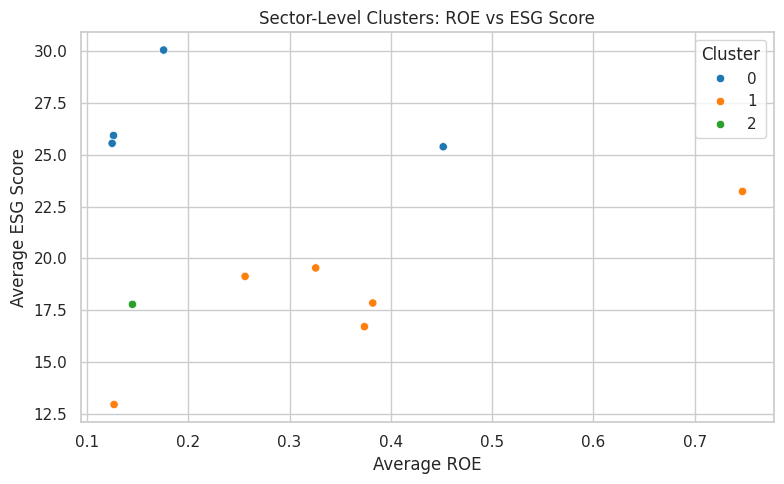

In [26]:
# Plot cluster results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=sector_means['roe'], y=sector_means['esg_score'], hue=sector_means['Cluster'], palette='tab10')
plt.title('Sector-Level Clusters: ROE vs ESG Score')
plt.xlabel('Average ROE')
plt.ylabel('Average ESG Score')
plt.tight_layout()
plt.show()

In [31]:

# Display the cluster-labeled sector averages
sector_means[['esg_score', 'roe', 'ebitda', 'marketcap', 'Cluster']]

,esg_score,roe,ebitda,marketcap,Cluster
sector,,,,,
Basic Materials,25.934091,0.126231,3.776433e+09,4.030841e+10,0
Communication Services,17.775556,0.144921,2.498937e+10,2.930625e+11,2
Consumer Cyclical,17.840930,0.382217,6.799094e+09,1.062976e+11,1
Consumer Defensive,25.389412,0.451757,6.195562e+09,8.450255e+10,0
Energy,30.060909,0.175688,1.131146e+10,7.999636e+10,0
Financial Services,19.126757,0.256147,5.221397e+09,8.344641e+10,1
Healthcare,19.536034,0.325846,6.708380e+09,9.279521e+10,1
Industrials,23.230597,0.747244,3.985567e+09,5.214394e+10,1
Real Estate,12.936552,0.126768,2.380299e+09,3.729751e+10,1
